<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-DL/blob/main/Fine_Tuning_%7C_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [25]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [26]:
import numpy as np
import pandas as pd

import tensorflow
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras import Sequential
from keras.utils import load_img, img_to_array, array_to_img
from keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions

In [27]:
base = VGG16(
    weights = 'imagenet',
    input_shape = (150, 150, 3),
    include_top = False
)

In [28]:
base.trainable = True

set_trainable = False

for layer in base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in base.layers:
  print(layer.name, layer.trainable)

input_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [29]:
model = Sequential()

model.add(base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [31]:
from keras.preprocessing.image import ImageDataGenerator

In [32]:
# train_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/train',
#     labels = 'inferred',
#     label_mode = 'int',
#     image_size = (150, 150),
#     batch_size = 32
# )

# test_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/test',
#     labels = 'inferred',
#     label_mode = 'int',
#     image_size = (150, 150),
#     batch_size = 32
# )
batch_size = 32

datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2
)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_ds = datagen.flow_from_directory(
    '/content/train',
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = 'binary'
)

test_ds = test_datagen.flow_from_directory(
    '/content/test',
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [17]:
# #Normalize
# def process(image, label):
#     image = tensorflow.cast(image/255. , tensorflow.float32)
#     return image, label

# train_ds = train_ds.map(process)
# test_ds = test_ds.map(process)

In [33]:
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=1e-5),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [34]:
history = model.fit(train_ds, epochs = 5, validation_data = test_ds)

<ipython-input-34-34d12cbf3997>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_ds, epochs = 5, validation_data = test_ds)


Epoch 1/5
625/625 [==============================] - 151s 239ms/step - loss: 0.2705 - accuracy: 0.8831 - val_loss: 0.1759 - val_accuracy: 0.9278
Epoch 2/5
625/625 [==============================] - 149s 238ms/step - loss: 0.1698 - accuracy: 0.9290 - val_loss: 0.1880 - val_accuracy: 0.9240
Epoch 3/5
625/625 [==============================] - 148s 236ms/step - loss: 0.1431 - accuracy: 0.9421 - val_loss: 0.1420 - val_accuracy: 0.9416
Epoch 4/5
625/625 [==============================] - 148s 236ms/step - loss: 0.1230 - accuracy: 0.9520 - val_loss: 0.1157 - val_accuracy: 0.9548
Epoch 5/5
625/625 [==============================] - 146s 234ms/step - loss: 0.1081 - accuracy: 0.9579 - val_loss: 0.1408 - val_accuracy: 0.9438


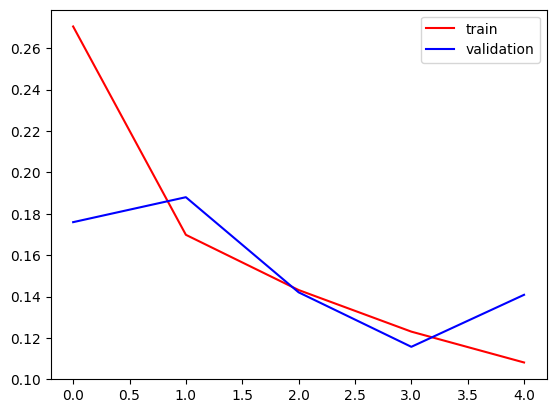

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

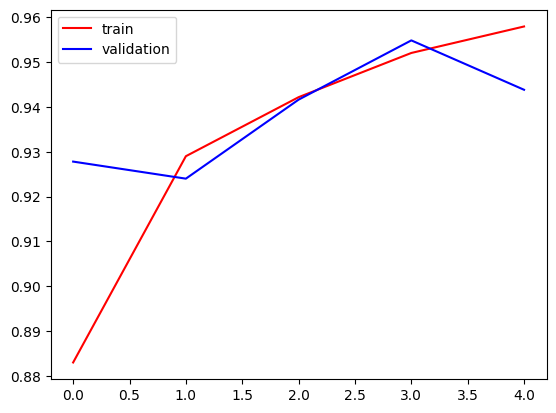

In [36]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()